In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
!pip install pyarrow

In [4]:
all_data=pd.read_feather('/content/drive/MyDrive/Portfolio/Sales_data.ftr')
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
all_data=all_data.dropna(how='all')

In [7]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [8]:
all_data = all_data.drop_duplicates()

In [9]:
#analysing monthly sales best month fpr sale that has maximum sale
all_data['Order Date'][0]

'04/19/19 08:46'

In [10]:
'04/19/19 08:46'.split(' ')[0]
# in order to split the date consider space as a criteria as there is a space in between date and time. 0 index to get date

'04/19/19'

In [11]:
def return_month(x):
  return x.split('/')[0]
  #this is to get the month from the order date

In [12]:
all_data['Month']=all_data['Order Date'].apply(return_month)
#applying the function defined above to all data and saving it in month

In [13]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [14]:
all_data['Month'].unique()
#we can see there is a order date name in the list which we have to remove so that we can convert it into int function from object

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [15]:
filter1= (all_data['Month'] != 'Order Date')

In [16]:
all_data = all_data[filter1]
#it means we get all data that doesnot have the filter1 i.e it will exclude that line that has order date in order date.

In [17]:
all_data['Month'] = all_data['Month'].astype(int)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)

In [18]:
all_data['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [19]:
all_data['Price Each'] = all_data['Price Each'].astype(float)
#price could be in float value.

In [20]:
all_data['sales']= all_data['Quantity Ordered'] * all_data['Price Each']

In [21]:
all_data.groupby(['Month'])['sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='Month'>

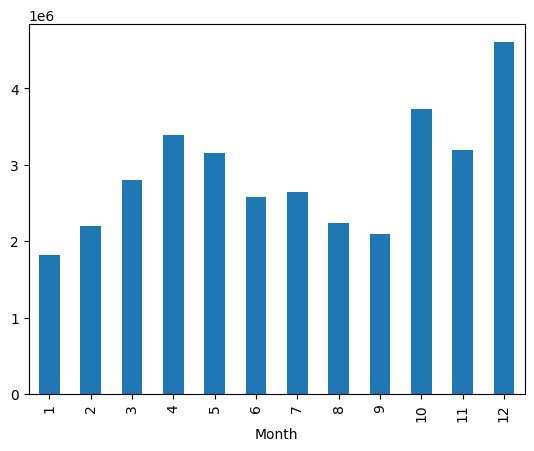

In [46]:
all_data.groupby(['Month'])['sales'].sum().plot(kind='bar')# the le6 stands for exponential 1*10^6

In [23]:
#we will now find out which city has maximum order. Here we split the purchase address on the basis of comma and got the 1st index which is the name of the place
all_data['Purchase Address'][0].split(',')[1]

' Dallas'

In [24]:
def return_Place(x):
  return x.split(',')[1]

In [25]:
all_data['Address']=all_data['Purchase Address'].str.split(',').str.get(1)

In [26]:
all_data['Address']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Address, Length: 185686, dtype: object

In [15]:
pd.value_counts(all_data['Address'])

 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: Address, dtype: int64

<Axes: ylabel='Address'>

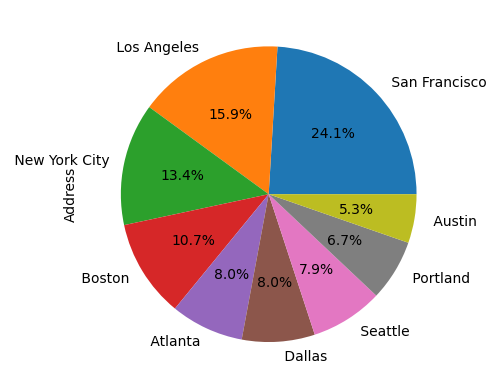

In [27]:
pd.value_counts(all_data['Address']).plot(kind='pie', autopct='%0.1f%%')#autopct is used to provide percent value to the pie

In [28]:
count_df=all_data.groupby(['Product']).agg({'Quantity Ordered':sum,'Price Each': np.mean})

In [56]:
count_df

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84
AAA Batteries (4-pack),30986,2.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
Flatscreen TV,4813,300.00


In [29]:
count_df=count_df.reset_index()#used to reset the index

In [30]:
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [31]:
products=count_df['Product'].values

<ipython-input-32-950df9707c43>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', fontsize=10)#used to rotate the name of products on x axis


Text(0, 0.5, 'Avg Price Of Product')

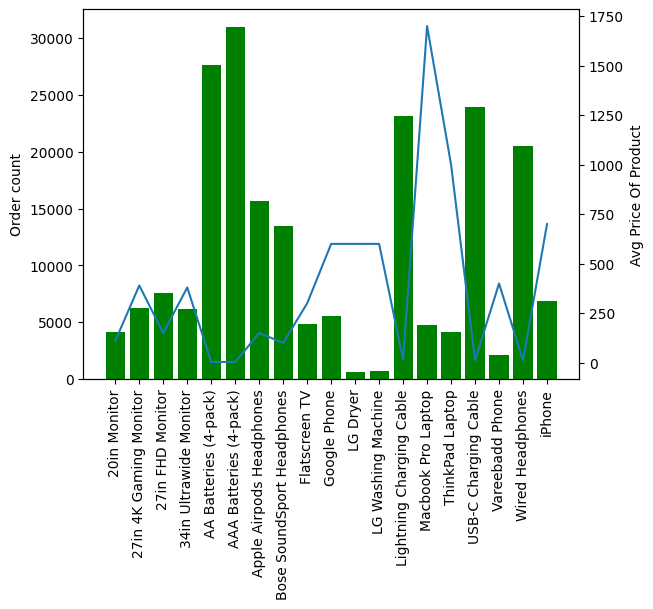

In [32]:
fig, ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color='g')
ax2.plot(count_df['Product'], count_df['Price Each'])
ax1.set_xticklabels(products, rotation='vertical', fontsize=10)#used to rotate the name of products on x axis
ax1.set_ylabel('Order count') #used to label the axis on both sides
ax2.set_ylabel('Avg Price Of Product')
#we can see AAA batteries is being sold most and has the lowest price hence item sold is inversly proportional to price

In [36]:
#now we have to find the most sold product and for that we will get the top five products.
most_sold_product=all_data['Product'].value_counts()[0:5].index

In [48]:
most_sold_product_df=all_data[all_data['Product'].isin(most_sold_product)]
#isin is used to find out wther a product is there or not. so if it is true we have most sold product in that row.

In [49]:
most_sold_product_df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


In [52]:
most_sold_product_df.groupby(['Month','Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [54]:
pivot=most_sold_product_df.groupby(['Month','Product']).size().unstack()#in order to convert it into pivot table we have to use unstack

In [56]:
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<Axes: xlabel='Month'>

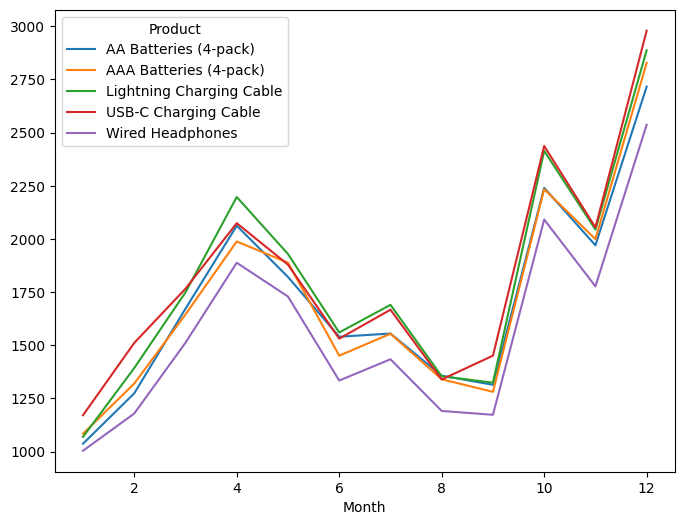

In [57]:
pivot.plot(figsize=(8,6))# from here we can conclude that december is the best month where most product are sold.

In [73]:
#what products are most often sold.
df_duplicated=all_data[all_data['Order ID'].duplicated(keep=False)]

In [74]:
df_duplicated#all these have duplicated id.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,Address
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [70]:
dup_pro=df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index().rename(columns={'Product':'Grouped_Products'})
#group data on the basis of order id feature where we have to join product on the basis of comma.

In [71]:
dup_pro

,Order ID,Grouped_Products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [77]:
dup_prod_df=df_duplicated.merge(dup_pro, how='left', on='Order ID')
#here we joined the df_duplicated with dup_pro on the basis of order id

In [78]:
no_dup_df=dup_prod_df.drop_duplicates(subset=['Order ID'])#removing the duplicate if any.

In [79]:
no_dup_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,Address,Grouped_Products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,09/28/19 13:07,"795 Willow St, New York City, NY 10001",9,700.00,New York City,"iPhone,Wired Headphones"
14120,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,"iPhone,Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"


<Axes: ylabel='Grouped_Products'>

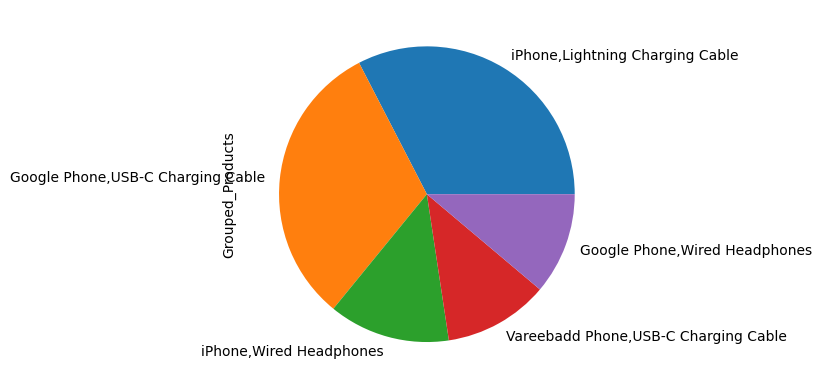

In [82]:
no_dup_df['Grouped_Products'].value_counts()[0:5].plot(kind='pie')